# Stage 2: Task 1
Erika Sudderth  
03/22/2021

### Prepare dataframe  
Import necessary libraries and the dataset of cases, deaths, and populations.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
import scipy.stats as stats
import matplotlib.pyplot as plt

super_dataset = pd.read_csv('../../../../data/stage_I/superDataset.csv')

### Obtain list of weekly means (Cases)  
1.) Get a dataframe with information only for a single state.  
2.) Remove all columns except those with cases information.    
3.) Find the number of new cases each day.  
4.) Group information by week and find each weekly average.  
5.) Return the list of mean new weekly cases.

In [2]:
def get_mean_cases(state_FIPS):
    # Get dataset with only one state's values
    state_dataset = super_dataset[super_dataset['StateFIPS'] == state_FIPS]
    
    # Get dataset with only the cases' and deaths' values
    cases_and_deaths = state_dataset[state_dataset.columns[5:]]
    
    # Separate dataframe to just the cases and remove the suffix.
    cases = cases_and_deaths[cases_and_deaths.columns[::2]]
    cases.columns = cases.columns.str.rstrip('_cases')
    cases.columns = pd.to_datetime(cases.columns)

    # Find the difference between each day and the previous day to get new case values. Sum these values for each
    # column (total new cases for each day for all counties)
    new_cases = cases.diff(axis=1)
    new_cases['2020-01-22'] = cases['2020-01-22']
    new_cases_df = new_cases.sum().to_frame()

    # Convert the column labels to datetime and create two indexes (one for the year, and one for the week of the year)
    # Group by the year first then week and find the week for each week.
    new_cases_df.columns = pd.to_datetime(new_cases_df.columns)
    new_cases_df = new_cases_df.set_index([cases.columns.isocalendar().year, cases.columns.isocalendar().week])
    new_cases_mean = new_cases_df.groupby(level= [0, 1]).mean()
    
    return new_cases_mean['1970-01-01']

### Weekly Statistics (Cases)  
Print out the mean, median, and mode for Oregon.

In [3]:
OR_mean = print('Oregon Mean (Cases): ', math.ceil(get_mean_cases(41).mean()))
OR_median = print('Oregon Median (Cases): ', math.ceil(get_mean_cases(41).median()))
OR_mode = print('Oregon Mode (Cases): ', math.ceil(get_mean_cases(41).mode()))

Oregon Mean (Cases):  383
Oregon Median (Cases):  276
Oregon Mode (Cases):  0


### Normalize Mean Cases
1.) Find the mean of the weekly statistics for a state.  
2.) Divide the mean by the state's population.  
3.) Multiple this value by 100000 to normalize the data.  
4.) Return the ceiling of this value.

In [4]:
def get_normalized_mean_cases(state_fips):
    state_data =  super_dataset[super_dataset['StateFIPS'] == state_fips]
    state_pop = state_data['population'].sum()
    mean = (get_mean_cases(state_fips).mean() / state_pop) * 100000
    return math.ceil(mean)

### Compare State Data (Cases)  
Get the normalized means for Oregon, Washington, California, North Carolina, Virginia, and New York.

In [5]:
OR_mean = get_normalized_mean_cases(41)
WA_mean = get_normalized_mean_cases(53)
CA_mean = get_normalized_mean_cases(6)
NC_mean = get_normalized_mean_cases(37)
VA_mean = get_normalized_mean_cases(51)
NY_mean = get_normalized_mean_cases(36)

Print out a chart of the normalized mean values for all six states. Here, the values show that the mean data is similar between Oregon and Washington and then between California, North Carolina, and New York, with Virginia being a bit of an outlier.

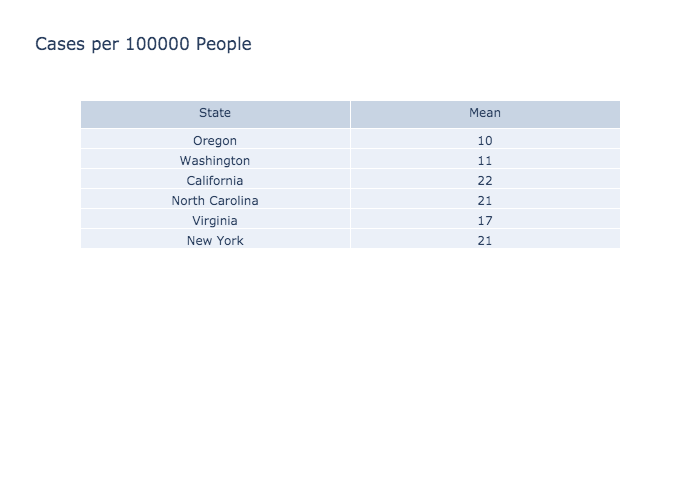

In [6]:
mean_chart = go.Figure(data=[go.Table(header=dict(values=['State', 'Mean']),
                 cells=dict(values=[['Oregon', 'Washington', 'California', 'North Carolina', 'Virginia', 'New York'],
                [OR_mean, WA_mean, CA_mean, NC_mean, VA_mean, NY_mean]]))
                     ])
mean_chart.update_layout(title_text = 'Cases per 100000 People')

cases_image = mean_chart.to_image(format="png")
Image(cases_image)

### Obtain list of weekly means (Deaths)  
1.) Get a dataframe with information only for a single state.  
2.) Remove all columns except those with deaths information.    
3.) Find the number of new deaths each day.  
4.) Group information by week and find each weekly average.  
5.) Return the list of mean new weekly deaths.

In [7]:
def get_mean_deaths(state_FIPS):
    # Get dataset with only one state's values
    state_dataset = super_dataset[super_dataset['StateFIPS'] == state_FIPS]
    
    # Get dataset with only the cases' and deaths' values
    cases_and_deaths = state_dataset[state_dataset.columns[5:]]
    
    # Separate dataframe to just the deaths and remove the suffix.
    deaths = cases_and_deaths[cases_and_deaths.columns[1::2]]
    deaths.columns = deaths.columns.str.rstrip('_deaths')
    deaths.columns = pd.to_datetime(deaths.columns)

    # Find the difference between each day and the previous day to get new death values. Sum these values for each
    # column (total new deaths for each day for all counties)
    new_deaths = deaths.diff(axis=1)
    new_deaths['2020-01-22'] = deaths['2020-01-22']
    new_deaths_df = new_deaths.sum().to_frame()
    
    # Convert the column labels to datetime and create two indexes (one for the year, and one for the week of the year)
    # Group by the year first then week and find the week for each week.
    new_deaths_df.columns = pd.to_datetime(new_deaths_df.columns)
    new_deaths_df = new_deaths_df.set_index([deaths.columns.isocalendar().year, deaths.columns.isocalendar().week])
    new_deaths_mean = new_deaths_df.groupby(level= [0, 1]).mean()
    #new_deaths_mean = new_deaths_mean.round().replace(0, np.nan)
    return new_deaths_mean['1970-01-01']

### Weekly Statistics (Deaths)  
Print out the mean, median, and mode for Oregon.

In [8]:
OR_mean_deaths = print('Oregon Mean (Deaths): ', math.ceil(get_mean_deaths(41).mean()))
OR_median_deaths = print('Oregon Median (Deaths): ', math.ceil(get_mean_deaths(41).median()))
OR_mode_deaths = print('Oregon Mode (Deaths): ', get_mean_deaths(41).mode())

Oregon Mean (Deaths):  6
Oregon Median (Deaths):  4
Oregon Mode (Deaths):  0    0.0
dtype: float64


### Normalize Mean Deaths
1.) Find the mean of the weekly statistics for a state.  
2.) Divide the mean by the state's population.  
3.) Multiple this value by 100000 to normalize the data.  
4.) Return the ceiling of this value.

In [118]:
def get_normalized_mean_deaths(state_fips):
    state_data =  super_dataset[super_dataset['StateFIPS'] == state_fips]
    state_pop = state_data['population'].sum()
    mean = (get_mean_deaths(state_fips).mean() / state_pop) * 100000
    return math.ceil(mean)

### Compare State Data (Deaths)   
Get the normalized means for Oregon, Washington, California, North Carolina, Virginia, and New York.

In [119]:
OR_mean2 = get_normalized_mean_deaths(41)
WA_mean2 = get_normalized_mean_deaths(53)
CA_mean2 = get_normalized_mean_deaths(6)
NC_mean2 = get_normalized_mean_deaths(37)
VA_mean2 = get_normalized_mean_deaths(51)
NY_mean2 = get_normalized_mean_deaths(36)

Print out a chart of the normalized mean values for all six states. All six states have a mean of 1, indicating that the center number of new deaths a day per 100000 people is similar across these states.

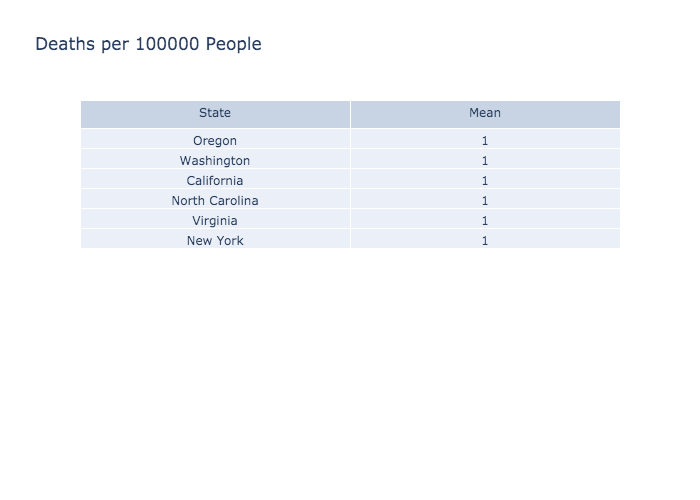

In [120]:
mean_chart_deaths = go.Figure(data=[go.Table(header=dict(values=['State', 'Mean']),
                 cells=dict(values=[['Oregon', 'Washington', 'California', 'North Carolina', 'Virginia', 'New York'],
                 [OR_mean2, WA_mean2, CA_mean2, NC_mean2, VA_mean2, NY_mean2]]))
                     ])
mean_chart_deaths.update_layout(title_text = 'Deaths per 100000 People')

deaths_image = mean_chart_deaths.to_image(format="png")
Image(deaths_image)

### Highest County Rates  
Calculate the normalized case rate per 100000 people and place these values in a column in the dataframe.

In [12]:
Oregon_dataset = super_dataset[super_dataset['StateFIPS'] == 41]
cases_rate = (Oregon_dataset[Oregon_dataset.columns[-2]] / Oregon_dataset['population']) * 100000
Oregon_dataset['Cases per 100000'] = np.ceil(cases_rate).replace(np.inf, np.nan)

<ipython-input-12-7b8e7502e308>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Calculate the normalized death rate per 100000 people and place these values in a column in the dataframe.

In [13]:
deaths_rate = (Oregon_dataset[Oregon_dataset.columns[-2]] / Oregon_dataset['population']) * 100000
Oregon_dataset['Deaths per 100000'] = np.ceil(deaths_rate).replace(np.inf, np.nan)

<ipython-input-13-f08ff4570076>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Display the top 5 counties with the highest case rates.

In [14]:
Oregon_dataset.nlargest(5, 'Cases per 100000')

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,...,2021-03-01_cases,2021-03-01_deaths,2021-03-02_cases,2021-03-02_deaths,2021-03-03_cases,2021-03-03_deaths,2021-03-04_cases,2021-03-04_deaths,Cases per 100000,Deaths per 100000
2268,41045,Malheur County,OR,41,30571,0,0,0,0,0,...,3351,58,3351,58,3353,58,3354,58,10972.0,190.0
2275,41059,Umatilla County,OR,41,77950,0,0,0,0,0,...,7660,82,7671,82,7678,82,7696,82,9873.0,106.0
2270,41049,Morrow County,OR,41,11603,0,0,0,0,0,...,1049,14,1050,14,1050,14,1050,14,9050.0,121.0
2261,41031,Jefferson County,OR,41,24658,0,0,0,0,0,...,1960,28,1962,28,1966,28,1976,30,8014.0,122.0
2269,41047,Marion County,OR,41,347818,0,0,0,0,0,...,18486,285,18513,285,18541,285,18579,287,5342.0,83.0


Display the top 5 counties with the highest death rates.

In [15]:
Oregon_dataset.nlargest(5, 'Deaths per 100000')

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,...,2021-03-01_cases,2021-03-01_deaths,2021-03-02_cases,2021-03-02_deaths,2021-03-03_cases,2021-03-03_deaths,2021-03-04_cases,2021-03-04_deaths,Cases per 100000,Deaths per 100000
2268,41045,Malheur County,OR,41,30571,0,0,0,0,0,...,3351,58,3351,58,3353,58,3354,58,10972.0,190.0
2259,41027,Hood River County,OR,41,23382,0,0,0,0,0,...,1069,29,1069,29,1069,29,1070,29,4577.0,125.0
2261,41031,Jefferson County,OR,41,24658,0,0,0,0,0,...,1960,28,1962,28,1966,28,1976,30,8014.0,122.0
2270,41049,Morrow County,OR,41,11603,0,0,0,0,0,...,1049,14,1050,14,1050,14,1050,14,9050.0,121.0
2275,41059,Umatilla County,OR,41,77950,0,0,0,0,0,...,7660,82,7671,82,7678,82,7696,82,9873.0,106.0


### Daily Trends  
Obtain dataframes containing only case information and only death information.

In [16]:
OR_cases_deaths = Oregon_dataset[Oregon_dataset.columns[5:-2]]
OR_cases = pd.concat([Oregon_dataset[Oregon_dataset.columns[0:5]],OR_cases_deaths[OR_cases_deaths.columns[0::2]]], axis=1)
OR_deaths = pd.concat([Oregon_dataset[Oregon_dataset.columns[0:5]],OR_cases_deaths[OR_cases_deaths.columns[1::2]]], axis=1)

1.) Get a dataframe containing the number of new cases each day.  
2.) Normalize this data by dividing it by the state of Oregon's population and multiplying it by 100000.  
3.) Take the log value of the normalized cases.  
4.) Repeat this for new deaths.

In [17]:
new_cases = OR_cases[OR_cases.columns[5:]].diff(axis=1)
new_cases['2020-01-22_cases'] = OR_cases['2020-01-22_cases']
new_cases_df = new_cases.sum().to_frame()
new_cases_df = new_cases_df[new_cases_df[0] >= 0]

normalized_cases = new_cases_df.apply(lambda x: (x / Oregon_dataset['population'].sum()) * 100000)
normalized_cases = normalized_cases[normalized_cases[0] >= 0]
normalized_cases2 = normalized_cases.replace(0, 1)
log_cases = normalized_cases2.apply(np.log)

new_deaths = OR_deaths[OR_deaths.columns[5:]].diff(axis=1)
new_deaths['2020-01-22_deaths'] = OR_deaths['2020-01-22_deaths']
new_deaths_df = new_deaths.sum().to_frame()
new_deaths_df = new_deaths_df[new_deaths_df[0] >= 0]

normalized_deaths = new_deaths_df.apply(lambda x: (x / Oregon_dataset['population'].sum()) * 100000)
normalized_deaths2 = normalized_deaths.replace(0, 1)
log_deaths = normalized_deaths2.apply(np.log)

1.) Get dataframe with information for a single county.  
2.) Find the new cases per day.  
3.) Normalize these values by dividing by the county's population and multiplying by 100000.  
4.) Take the log value of the normalized values.  
5.) Return the log values.

In [18]:
def get_county_cases(county_fips):
    county_cases = OR_cases[OR_cases['countyFIPS'] == county_fips]
    new_county_cases = county_cases[county_cases.columns[5:]].diff(axis=1)
    new_county_cases['2020-01-22_cases'] = county_cases['2020-01-22_cases']

    normalized_county_cases = new_county_cases.apply(lambda x: (x / county_cases['population']) * 100000)
    normalized_county_cases = normalized_county_cases.replace(0, 1)
    log_county_cases = normalized_county_cases.apply(np.log)
    log_county_cases = log_county_cases.transpose()
    return log_county_cases

Get the log normalized cases for the top 5 counties with the highest case rates in Oregon.

In [19]:
Malheur_cases = get_county_cases(41045)
Umatilla_cases = get_county_cases(41059)
Morrow_cases = get_county_cases(41049)
Jefferson_cases = get_county_cases(41031)
Marion_cases = get_county_cases(41047)

### Oregon Cases

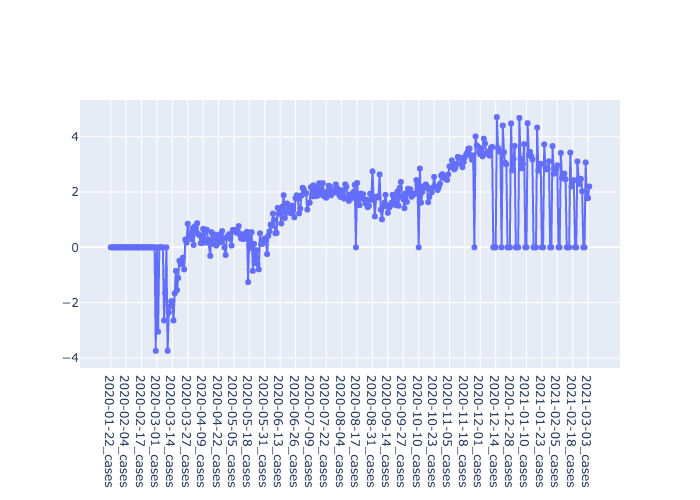

In [20]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=log_cases.index, y=log_cases[0],
                    mode='lines+markers',
                    name='Oregon'))
fig1 = fig1.to_image(format="png")
Image(fig1)

### Malheur County Cases

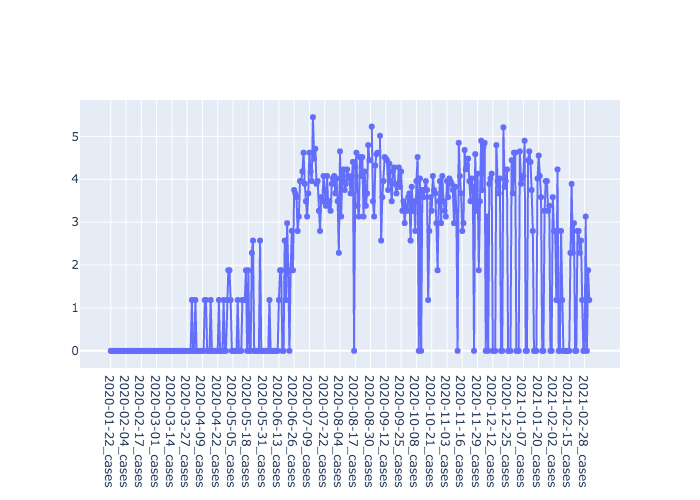

In [21]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=Malheur_cases.index, y=Malheur_cases[2268],
                    mode='lines+markers',
                    name='Malheur County'))
fig2 = fig2.to_image(format="png")
Image(fig2)

### Umatilla County Cases

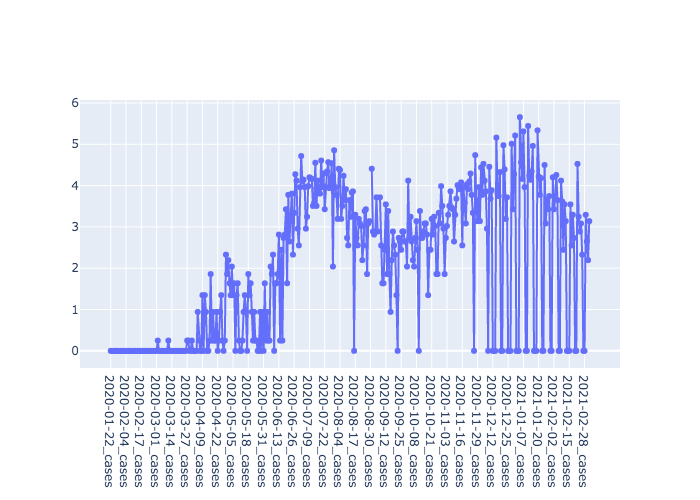

In [22]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=Umatilla_cases.index, y=Umatilla_cases[2275],
                    mode='lines+markers',
                    name='Umatilla County'))
fig3 = fig3.to_image(format="png")
Image(fig3)

### Morrow County Cases

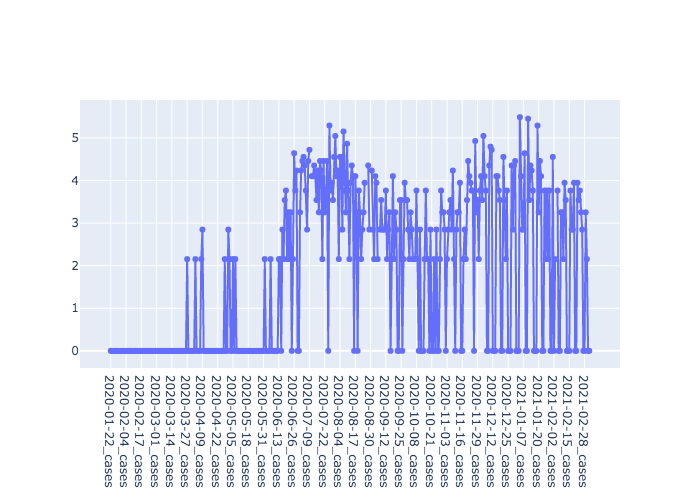

In [23]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=Morrow_cases.index, y=Morrow_cases[2270],
                    mode='lines+markers',
                    name='Morrow County'))
fig4 = fig4.to_image(format="png")
Image(fig4)

### Jefferson County Cases

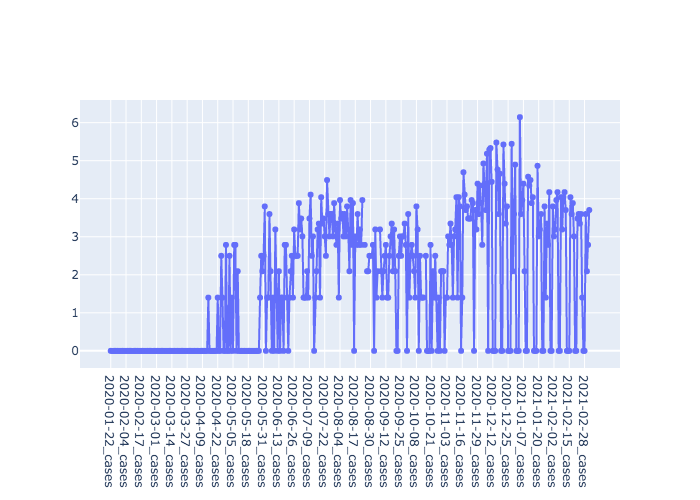

In [24]:
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=Jefferson_cases.index, y=Jefferson_cases[2261],
                    mode='lines+markers',
                    name='Jefferson County'))
fig5 = fig5.to_image(format="png")
Image(fig5)

### Marion County Cases

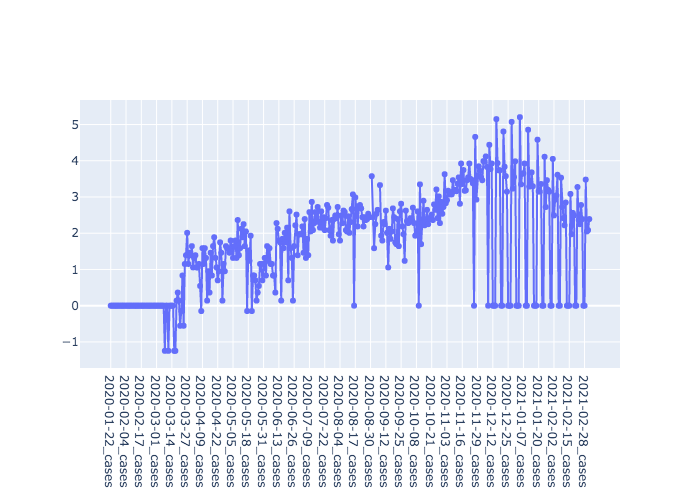

In [25]:
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=Marion_cases.index, y=Marion_cases[2269],
                    mode='lines+markers',
                    name='Marion County'))
fig6 = fig6.to_image(format="png")
Image(fig6)

1.) Get dataframe with information for a single county.  
2.) Find the new deaths per day.  
3.) Normalize these values by dividing by the county's population and multiplying by 100000.  
4.) Take the log value of the normalized values.  
5.) Return the log values

In [26]:
def get_county_deaths(county_fips):
    county_deaths = OR_deaths[OR_deaths['countyFIPS'] == county_fips]
    new_county_deaths = county_deaths[county_deaths.columns[5:]].diff(axis=1)
    new_county_deaths['2020-01-22_deaths'] = county_deaths['2020-01-22_deaths']

    normalized_county_deaths = new_county_deaths.apply(lambda x: (x / county_deaths['population']) * 100000)
    normalized_county_deaths = normalized_county_deaths.replace(0, 1)
    log_county_deaths = normalized_county_deaths.apply(np.log)
    log_county_deaths = log_county_deaths.transpose()
    return log_county_deaths

Get the log normalized deaths for the top 5 counties with the highest death rates in Oregon.

In [27]:
Malheur_deaths = get_county_deaths(41045)
Hood_River_deaths = get_county_deaths(41027)
Jefferson_deaths = get_county_deaths(41031)
Morrow_deaths = get_county_deaths(41049)
Umatilla_deaths = get_county_deaths(41059)

### Oregon Deaths

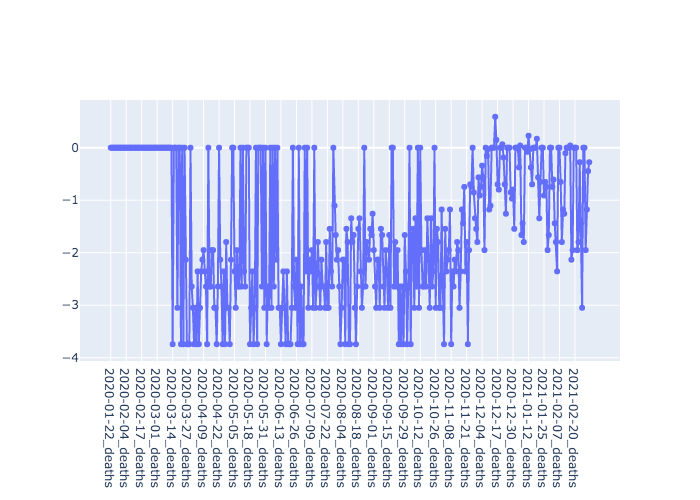

In [28]:
fig7 = go.Figure()
fig7.add_trace(go.Scatter(x=log_deaths.index, y=log_deaths[0],
                    mode='lines+markers',
                    name='Oregon'))
fig7 = fig7.to_image(format="png")
Image(fig7)

### Malheur County Deaths

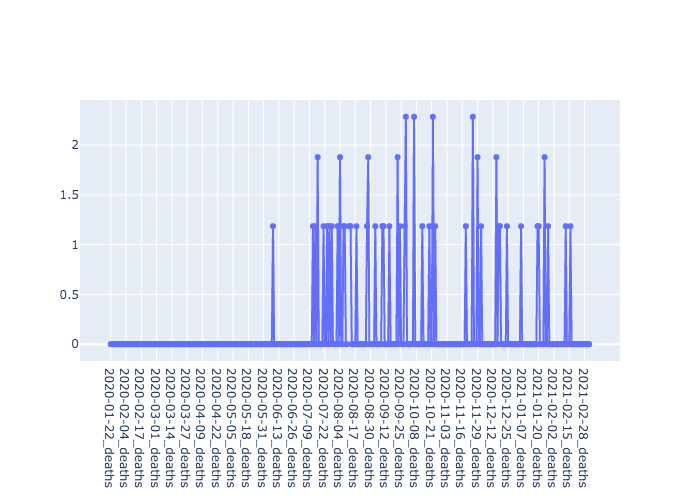

In [29]:
fig8 = go.Figure()
fig8.add_trace(go.Scatter(x=Malheur_deaths.index, y=Malheur_deaths[2268],
                    mode='lines+markers',
                    name='Malheur County'))
fig8 = fig8.to_image(format="png")
Image(fig8)

### Hood River County Deaths

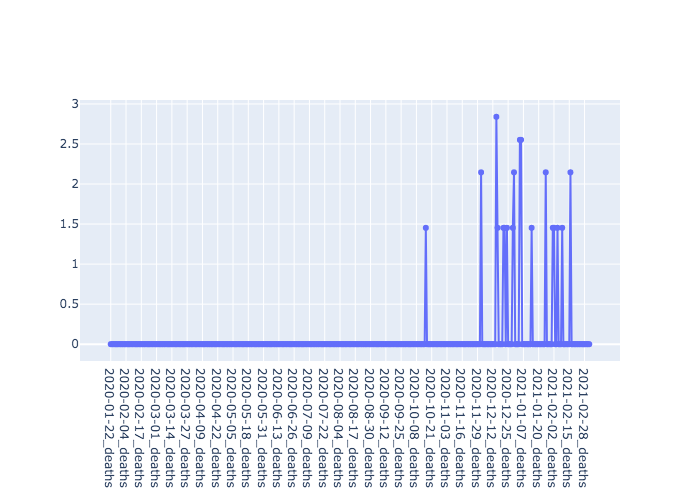

In [30]:
fig9 = go.Figure()
fig9.add_trace(go.Scatter(x=Hood_River_deaths.index, y=Hood_River_deaths[2259],
                    mode='lines+markers',
                    name='Hood River County'))
fig9 = fig9.to_image(format="png")
Image(fig9)

### Jefferson County Deaths

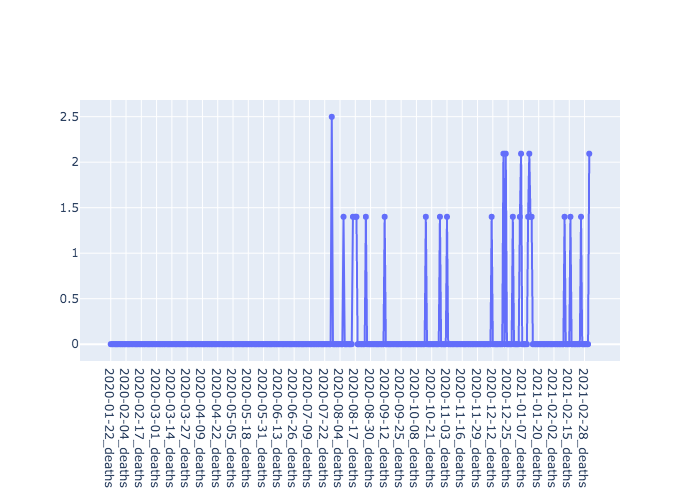

In [31]:
fig10 = go.Figure()
fig10.add_trace(go.Scatter(x=Jefferson_deaths.index, y=Jefferson_deaths[2261],
                    mode='lines+markers',
                    name='Jefferson County'))
fig10 = fig10.to_image(format="png")
Image(fig10)

### Morrow County Deaths

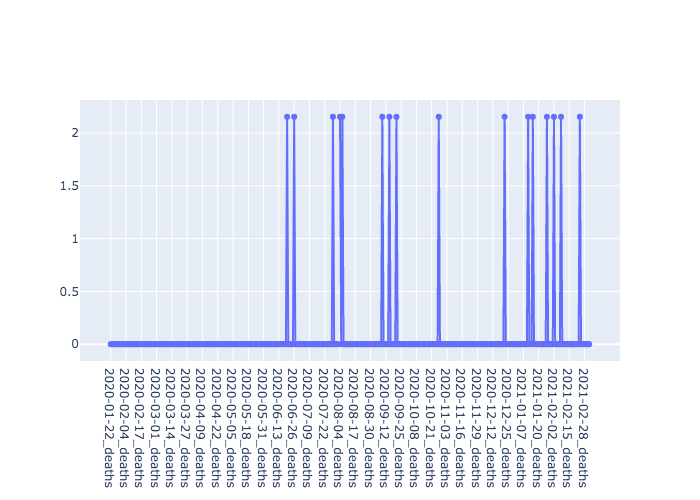

In [32]:
fig11 = go.Figure()
fig11.add_trace(go.Scatter(x=Morrow_deaths.index, y=Morrow_deaths[2270],
                    mode='lines+markers',
                    name='Morrow County'))
fig11 = fig11.to_image(format="png")
Image(fig11)

### Umatilla County Deaths

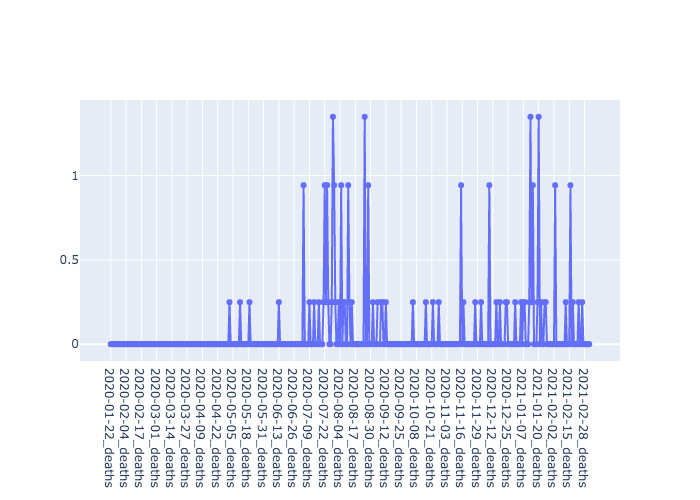

In [33]:
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x=Umatilla_deaths.index, y=Umatilla_deaths[2275],
                    mode='lines+markers',
                    name='Umatilla County'))
fig12 = fig12.to_image(format="png")
Image(fig12)

# Task 2  
### Oregon Distribution  
This histogram shows the count of the number of new cases in certain categories.

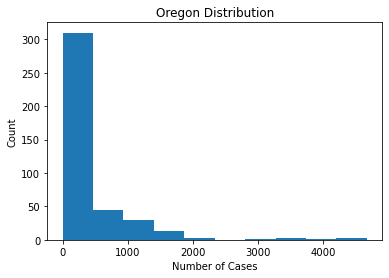

In [34]:
plt.hist(new_cases_df, bins=10)
plt.title("Oregon Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

The following histogram shows the count of the number of new cases per day per 100000 people for the COVID-19 data.

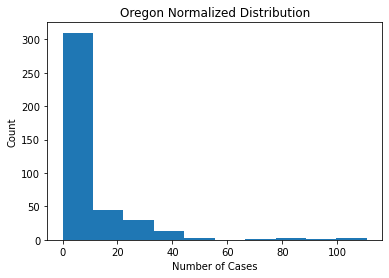

In [35]:
plt.hist(normalized_cases, bins=10)
plt.title("Oregon Normalized Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

### Probability Mass Function  
1.) Count the number of cases in each of the 10 bins.  
2.) Create a dataframe with those counts and the label of the bin.  
3.) Plot the pmf.

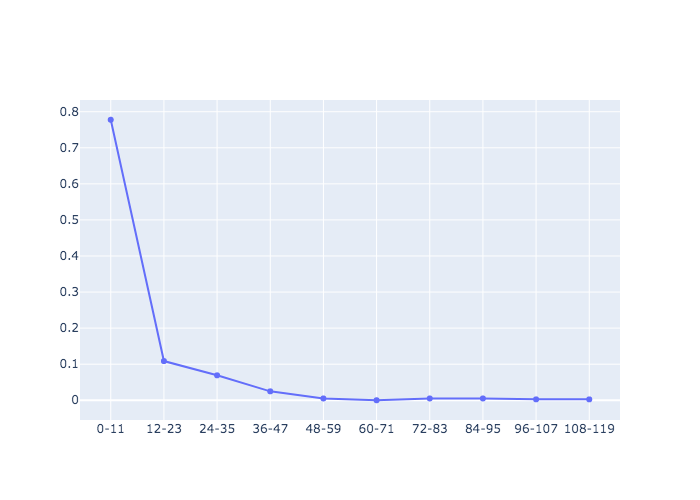

In [36]:
minimum = normalized_cases[0].min()
maximum = normalized_cases[0].max()
bin_min = 0
bin_max = math.ceil(maximum / 10)

bins = []
for i in range(10):
    bins.append(0)
    
for case in normalized_cases[0]:
    if case >= bin_min and case < bin_max:
        bins[0] = bins[0] + 1
    elif case >= bin_max and case < 2 * bin_max:
        bins[1] = bins[1] + 1
    elif case >= 2 * bin_max and case < 3 * bin_max:
        bins[2] = bins[2] + 1
    elif case >= 3 * bin_max and case < 4 * bin_max:
        bins[3] = bins[3] + 1 
    elif case >= 4 * bin_max and case < 5 * bin_max:
        bins[4] = bins[4] + 1
    elif case >= 5 * bin_max and case < 6 * bin_max:
        bins[5] = bins[5] + 1
    elif case >= 6 * bin_max and case < 7 * bin_max:
        bins[6] = bins[6] + 1
    elif case >= 7 * bin_max and case < 8 * bin_max:
        bins[7] = bins[7] + 1
    elif case >= 8 * bin_max and case < 9 * bin_max:
        bins[8] = bins[8] + 1
    elif case >= 9 * bin_max and case < 10 * bin_max:
        bins[9] = bins[9] + 1
        

bin_df = pd.DataFrame(bins, columns = ['Count'])
bin_df['Range'] = ['0-11', '12-23', '24-35', '36-47', '48-59', '60-71', '72-83', '84-95', '96-107', '108-119']
bin_df['Count'] = bin_df['Count'].apply(lambda x: x / bin_df['Count'].sum())
bin_df = bin_df.set_index('Range')


fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_df.index, y=bin_df['Count'],
                    mode='lines+markers',
                    name=''))
fig = fig.to_image(format="png")
Image(fig)

The Oregon data is skewed to the right with a long tail. It has a high kurtosis, meaning there is high peakedness. The data has a single peak, with the most likely number of new cases per day to be 0-11 per 100000 people. In general, there is a lower probability of having higher numbers of cases per day.

In [37]:
print('Skew: ', normalized_cases[0].skew())
print('Kurtosis: ', normalized_cases[0].kurt())
print('Mean: ', normalized_cases[0].mean())
print('Median: ', normalized_cases[0].median())
print('Variance: ', normalized_cases[0].var())
print('Standard Deviation: ', normalized_cases[0].std())

Skew:  3.5316445730491606
Kurtosis:  17.06124512021344
Mean:  9.201002197957676
Median:  4.789298147324027
Variance:  209.5426064244796
Standard Deviation:  14.475586565817622


### Washington Distribution  
Repeat the process for the Washington data.

In [38]:
WA_dataset = super_dataset[super_dataset['StateFIPS'] == 53]
WA_cases_deaths = WA_dataset[WA_dataset.columns[5:-2]]
WA_cases = pd.concat([WA_dataset[WA_dataset.columns[0:5]],WA_cases_deaths[WA_cases_deaths.columns[0::2]]], axis=1)
WA_deaths = pd.concat([WA_dataset[WA_dataset.columns[0:5]],WA_cases_deaths[WA_cases_deaths.columns[1::2]]], axis=1)

new_WA = WA_cases[WA_cases.columns[5:]].diff(axis=1)
new_WA['2020-01-22_cases'] = WA_cases['2020-01-22_cases']
new_WA_df = new_WA.sum().to_frame()
new_WA_df = new_WA_df[new_WA_df[0] >= 0]

normalized_WA = new_WA_df.apply(lambda x: (x / WA_dataset['population'].sum()) * 100000)
normalized_WA = normalized_WA[normalized_WA[0] >= 0]

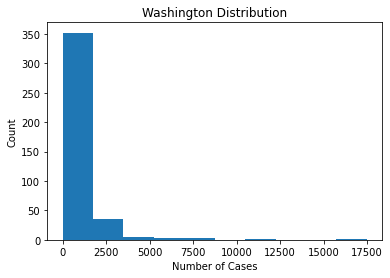

In [39]:
plt.hist(new_WA_df, bins=10)
plt.title("Washington Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

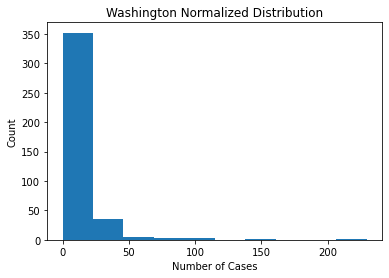

In [40]:
plt.hist(normalized_WA, bins=10)
plt.title("Washington Normalized Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

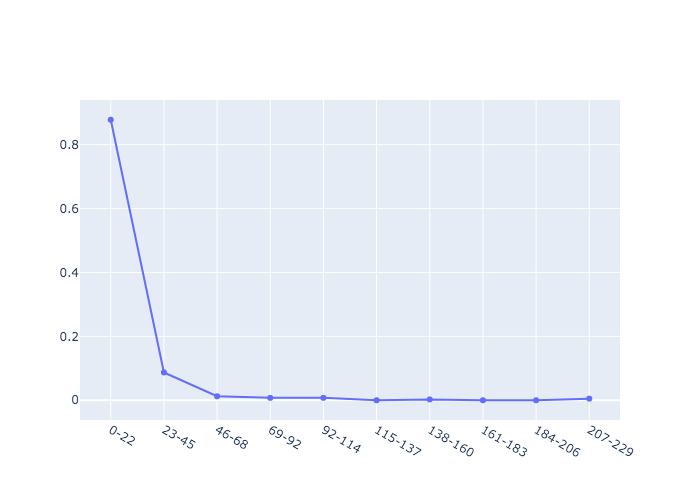

In [41]:
minimum = normalized_WA[0].min()
maximum = normalized_WA[0].max()
bin_min = 0
bin_max = math.ceil(maximum / 10)

bins = []
for i in range(10):
    bins.append(0)
    
for case in normalized_WA[0]:
    if case >= bin_min and case < bin_max:
        bins[0] = bins[0] + 1
    elif case >= bin_max and case < 2 * bin_max:
        bins[1] = bins[1] + 1
    elif case >= 2 * bin_max and case < 3 * bin_max:
        bins[2] = bins[2] + 1
    elif case >= 3 * bin_max and case < 4 * bin_max:
        bins[3] = bins[3] + 1 
    elif case >= 4 * bin_max and case < 5 * bin_max:
        bins[4] = bins[4] + 1
    elif case >= 5 * bin_max and case < 6 * bin_max:
        bins[5] = bins[5] + 1
    elif case >= 6 * bin_max and case < 7 * bin_max:
        bins[6] = bins[6] + 1
    elif case >= 7 * bin_max and case < 8 * bin_max:
        bins[7] = bins[7] + 1
    elif case >= 8 * bin_max and case < 9 * bin_max:
        bins[8] = bins[8] + 1
    elif case >= 9 * bin_max and case < 10 * bin_max:
        bins[9] = bins[9] + 1
        

bin_df = pd.DataFrame(bins, columns = ['Count'])
bin_df['Range'] = ['0-22', '23-45', '46-68', '69-92', '92-114', '115-137', '138-160', '161-183', '184-206', '207-229']
bin_df['Count'] = bin_df['Count'].apply(lambda x: x / bin_df['Count'].sum())
bin_df = bin_df.set_index('Range')


fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_df.index, y=bin_df['Count'],
                    mode='lines+markers',
                    name=''))
fig = fig.to_image(format="png")
Image(fig)

Compared to Oregon, the Washington data is skewed even more towards the right and has a higher kurtosis (higher peakedness). This data also has a single peak and a long tail. The most likely number of new cases per day per 100000 people falls within the 0-22 range with a lower probability of having a higher number of new cases. 

In [42]:
print('Skew: ', normalized_WA[0].skew())
print('Kurtosis: ', normalized_WA[0].kurt())
print('Mean: ', normalized_WA[0].mean())
print('Median: ', normalized_WA[0].median())
print('Variance: ', normalized_WA[0].var())
print('Standard Deviation: ', normalized_WA[0].std())

Skew:  5.825905154242046
Kurtosis:  44.512841274550674
Mean:  11.572243107660977
Median:  5.850377674380979
Variance:  500.02359725128434
Standard Deviation:  22.36120741935203


### California Distribution  
Repeat the process for the California data.

In [43]:
CA_dataset = super_dataset[super_dataset['StateFIPS'] == 6]
CA_cases_deaths = CA_dataset[CA_dataset.columns[5:-2]]
CA_cases = pd.concat([CA_dataset[CA_dataset.columns[0:5]],CA_cases_deaths[CA_cases_deaths.columns[0::2]]], axis=1)
CA_deaths = pd.concat([CA_dataset[CA_dataset.columns[0:5]],CA_cases_deaths[CA_cases_deaths.columns[1::2]]], axis=1)

new_CA = CA_cases[CA_cases.columns[5:]].diff(axis=1)
new_CA['2020-01-22_cases'] = CA_cases['2020-01-22_cases']
new_CA_df = new_CA.sum().to_frame()
new_CA_df = new_CA_df[new_CA_df[0] >= 0]

normalized_CA = new_CA_df.apply(lambda x: (x / CA_dataset['population'].sum()) * 100000)
normalized_CA = normalized_CA[normalized_CA[0] >= 0]

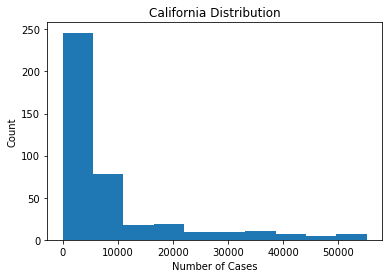

In [44]:
plt.hist(new_CA_df, bins=10)
plt.title("California Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

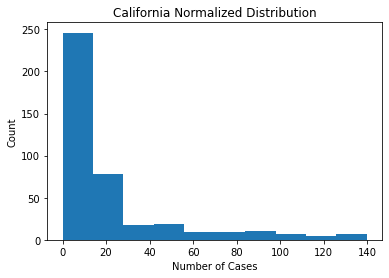

In [45]:
plt.hist(normalized_CA, bins=10)
plt.title("California Normalized Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

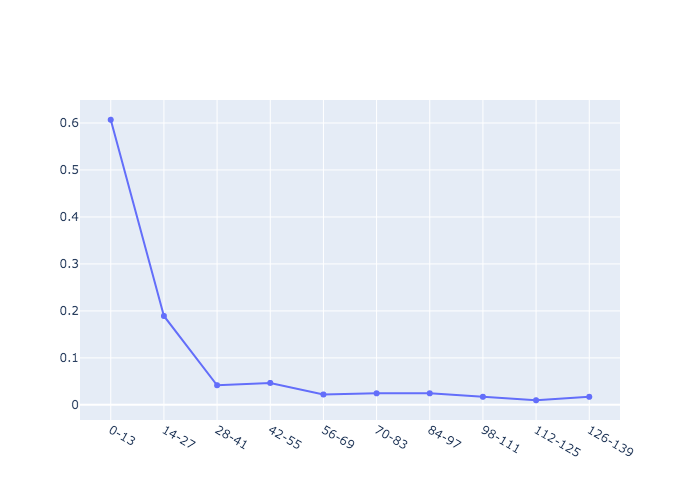

In [46]:
minimum = normalized_CA[0].min()
maximum = normalized_CA[0].max()
bin_min = 0
bin_max = math.ceil(maximum / 10)

bins = []
for i in range(10):
    bins.append(0)
    
for case in normalized_CA[0]:
    if case >= bin_min and case < bin_max:
        bins[0] = bins[0] + 1
    elif case >= bin_max and case < 2 * bin_max:
        bins[1] = bins[1] + 1
    elif case >= 2 * bin_max and case < 3 * bin_max:
        bins[2] = bins[2] + 1
    elif case >= 3 * bin_max and case < 4 * bin_max:
        bins[3] = bins[3] + 1 
    elif case >= 4 * bin_max and case < 5 * bin_max:
        bins[4] = bins[4] + 1
    elif case >= 5 * bin_max and case < 6 * bin_max:
        bins[5] = bins[5] + 1
    elif case >= 6 * bin_max and case < 7 * bin_max:
        bins[6] = bins[6] + 1
    elif case >= 7 * bin_max and case < 8 * bin_max:
        bins[7] = bins[7] + 1
    elif case >= 8 * bin_max and case < 9 * bin_max:
        bins[8] = bins[8] + 1
    elif case >= 9 * bin_max and case < 10 * bin_max:
        bins[9] = bins[9] + 1
        

bin_df = pd.DataFrame(bins, columns = ['Count'])
bin_df['Range'] = ['0-13', '14-27', '28-41', '42-55', '56-69', '70-83', '84-97', '98-111', '112-125', '126-139']
bin_df['Count'] = bin_df['Count'].apply(lambda x: x / bin_df['Count'].sum())
bin_df = bin_df.set_index('Range')


fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_df.index, y=bin_df['Count'],
                    mode='lines+markers',
                    name=''))
fig = fig.to_image(format="png")
Image(fig)

Compared to the Oregon data, the California data is less skewed to the right and has a smaller kurtosis value, meaning it has a smaller peakedness. This data has a single peak and a long tail. The most likely number of new cases per day per 100000 people falls in the 0-13 range.

In [47]:
print('Skew: ', normalized_CA[0].skew())
print('Kurtosis: ', normalized_CA[0].kurt())
print('Mean: ', normalized_CA[0].mean())
print('Median: ', normalized_CA[0].median())
print('Variance: ', normalized_CA[0].var())
print('Standard Deviation: ', normalized_CA[0].std())

Skew:  2.157437463488277
Kurtosis:  4.22093676154725
Mean:  21.67068662416191
Median:  10.442338311362537
Variance:  876.8692821515289
Standard Deviation:  29.611978693622095


### North Carolina Distribution  
Repeat the process for the North Carolina data.

In [48]:
NC_dataset = super_dataset[super_dataset['StateFIPS'] == 37]
NC_cases_deaths = NC_dataset[NC_dataset.columns[5:-2]]
NC_cases = pd.concat([NC_dataset[NC_dataset.columns[0:5]],NC_cases_deaths[NC_cases_deaths.columns[0::2]]], axis=1)
NC_deaths = pd.concat([NC_dataset[NC_dataset.columns[0:5]],NC_cases_deaths[NC_cases_deaths.columns[1::2]]], axis=1)

new_NC = NC_cases[NC_cases.columns[5:]].diff(axis=1)
new_NC['2020-01-22_cases'] = NC_cases['2020-01-22_cases']
new_NC_df = new_NC.sum().to_frame()
new_NC_df = new_NC_df[new_NC_df[0] >= 0]

normalized_NC = new_NC_df.apply(lambda x: (x / NC_dataset['population'].sum()) * 100000)
normalized_NC = normalized_NC[normalized_NC[0] >= 0]

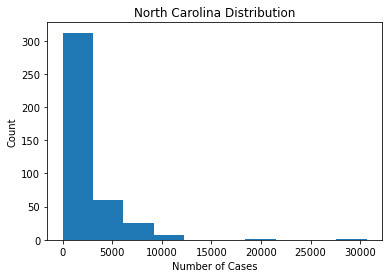

In [49]:
plt.hist(new_NC_df, bins=10)
plt.title("North Carolina Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

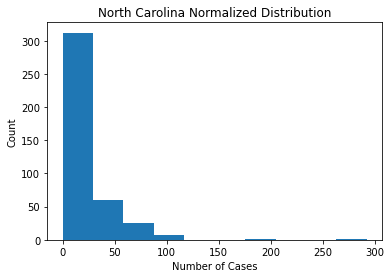

In [50]:
plt.hist(normalized_NC, bins=10)
plt.title("North Carolina Normalized Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

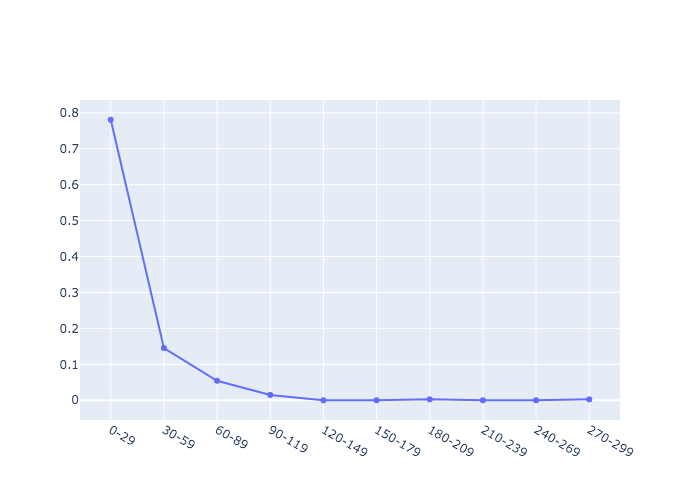

In [51]:
minimum = normalized_NC[0].min()
maximum = normalized_NC[0].max()
bin_min = 0
bin_max = math.ceil(maximum / 10)

bins = []
for i in range(10):
    bins.append(0)
    
for case in normalized_NC[0]:
    if case >= bin_min and case < bin_max:
        bins[0] = bins[0] + 1
    elif case >= bin_max and case < 2 * bin_max:
        bins[1] = bins[1] + 1
    elif case >= 2 * bin_max and case < 3 * bin_max:
        bins[2] = bins[2] + 1
    elif case >= 3 * bin_max and case < 4 * bin_max:
        bins[3] = bins[3] + 1 
    elif case >= 4 * bin_max and case < 5 * bin_max:
        bins[4] = bins[4] + 1
    elif case >= 5 * bin_max and case < 6 * bin_max:
        bins[5] = bins[5] + 1
    elif case >= 6 * bin_max and case < 7 * bin_max:
        bins[6] = bins[6] + 1
    elif case >= 7 * bin_max and case < 8 * bin_max:
        bins[7] = bins[7] + 1
    elif case >= 8 * bin_max and case < 9 * bin_max:
        bins[8] = bins[8] + 1
    elif case >= 9 * bin_max and case < 10 * bin_max:
        bins[9] = bins[9] + 1
        

bin_df = pd.DataFrame(bins, columns = ['Count'])
bin_df['Range'] = ['0-29', '30-59', '60-89', '90-119', '120-149', '150-179', '180-209', '210-239', '240-269', '270-299']
bin_df['Count'] = bin_df['Count'].apply(lambda x: x / bin_df['Count'].sum())
bin_df = bin_df.set_index('Range')


fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_df.index, y=bin_df['Count'],
                    mode='lines+markers',
                    name=''))
fig = fig.to_image(format="png")
Image(fig)

Compared to the Oregon data, the North Carolina data is skewed slightly more to the right, but has a higher kurtosis. There is a single peak with a long tail and the most likely number of new cases per day per 100000 people is in the 0-29 range.

In [52]:
print('Skew: ', normalized_NC[0].skew())
print('Kurtosis: ', normalized_NC[0].kurt())
print('Mean: ', normalized_NC[0].mean())
print('Median: ', normalized_NC[0].median())
print('Variance: ', normalized_NC[0].var())
print('Standard Deviation: ', normalized_NC[0].std())

Skew:  4.009832126090613
Kurtosis:  29.444147825381087
Mean:  20.461691657570572
Median:  12.838379250204326
Variance:  736.5472578387588
Standard Deviation:  27.139404154084865


### Virginia Distribution

In [53]:
VA_dataset = super_dataset[super_dataset['StateFIPS'] == 51]
VA_cases_deaths = VA_dataset[VA_dataset.columns[5:-2]]
VA_cases = pd.concat([VA_dataset[VA_dataset.columns[0:5]],VA_cases_deaths[VA_cases_deaths.columns[0::2]]], axis=1)
VA_deaths = pd.concat([VA_dataset[VA_dataset.columns[0:5]],VA_cases_deaths[VA_cases_deaths.columns[1::2]]], axis=1)

new_VA = VA_cases[VA_cases.columns[5:]].diff(axis=1)
new_VA['2020-01-22_cases'] = VA_cases['2020-01-22_cases']
new_VA_df = new_VA.sum().to_frame()
new_VA_df = new_VA_df[new_VA_df[0] >= 0]

normalized_VA = new_VA_df.apply(lambda x: (x / VA_dataset['population'].sum()) * 100000)
normalized_VA = normalized_VA[normalized_VA[0] >= 0]

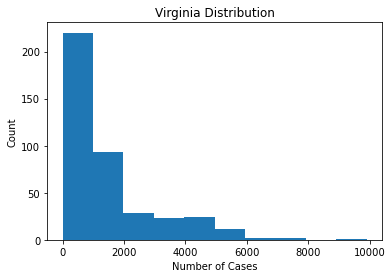

In [54]:
plt.hist(new_VA_df, bins=10)
plt.title("Virginia Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

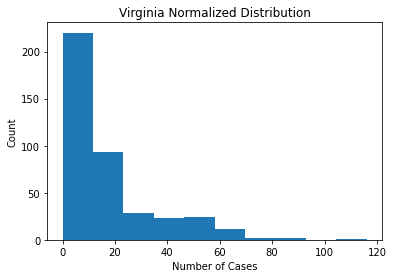

In [55]:
plt.hist(normalized_VA, bins=10)
plt.title("Virginia Normalized Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

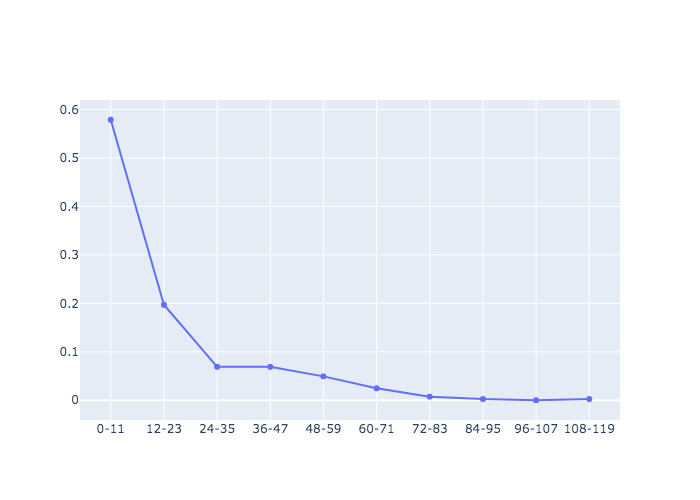

In [56]:
minimum = normalized_VA[0].min()
maximum = normalized_VA[0].max()
bin_min = 0
bin_max = math.ceil(maximum / 10)

bins = []
for i in range(10):
    bins.append(0)
    
for case in normalized_VA[0]:
    if case >= bin_min and case < bin_max:
        bins[0] = bins[0] + 1
    elif case >= bin_max and case < 2 * bin_max:
        bins[1] = bins[1] + 1
    elif case >= 2 * bin_max and case < 3 * bin_max:
        bins[2] = bins[2] + 1
    elif case >= 3 * bin_max and case < 4 * bin_max:
        bins[3] = bins[3] + 1 
    elif case >= 4 * bin_max and case < 5 * bin_max:
        bins[4] = bins[4] + 1
    elif case >= 5 * bin_max and case < 6 * bin_max:
        bins[5] = bins[5] + 1
    elif case >= 6 * bin_max and case < 7 * bin_max:
        bins[6] = bins[6] + 1
    elif case >= 7 * bin_max and case < 8 * bin_max:
        bins[7] = bins[7] + 1
    elif case >= 8 * bin_max and case < 9 * bin_max:
        bins[8] = bins[8] + 1
    elif case >= 9 * bin_max and case < 10 * bin_max:
        bins[9] = bins[9] + 1
        

bin_df = pd.DataFrame(bins, columns = ['Count'])
bin_df['Range'] = ['0-11', '12-23', '24-35', '36-47', '48-59', '60-71', '72-83', '84-95', '96-107', '108-119']
bin_df['Count'] = bin_df['Count'].apply(lambda x: x / bin_df['Count'].sum())
bin_df = bin_df.set_index('Range')


fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_df.index, y=bin_df['Count'],
                    mode='lines+markers',
                    name=''))
fig = fig.to_image(format="png")
Image(fig)

Compared to the Oregon data, the Virginia data is less skewed to the right and has a much smaller kurtosis. There is a single peak with a long tail. The most likely number of new cases per day per 100000 people falls in the 0-11 range.

In [57]:
print('Skew: ', normalized_VA[0].skew())
print('Kurtosis: ', normalized_VA[0].kurt())
print('Mean: ', normalized_VA[0].mean())
print('Median: ', normalized_VA[0].median())
print('Variance: ', normalized_VA[0].var())
print('Standard Deviation: ', normalized_VA[0].std())

Skew:  1.755803563957463
Kurtosis:  3.4092433060816387
Mean:  16.743883294050168
Median:  10.960083388016592
Variance:  322.45837822657427
Standard Deviation:  17.95712611267667


### New York Distribution

In [58]:
NY_dataset = super_dataset[super_dataset['StateFIPS'] == 36]
NY_cases_deaths = NY_dataset[NY_dataset.columns[5:-2]]
NY_cases = pd.concat([NY_dataset[NY_dataset.columns[0:5]],NY_cases_deaths[NY_cases_deaths.columns[0::2]]], axis=1)
NY_deaths = pd.concat([NY_dataset[NY_dataset.columns[0:5]],NY_cases_deaths[NY_cases_deaths.columns[1::2]]], axis=1)

new_NY = NY_cases[NY_cases.columns[5:]].diff(axis=1)
new_NY['2020-01-22_cases'] = NY_cases['2020-01-22_cases']
new_NY_df = new_NY.sum().to_frame()
new_NY_df = new_NY_df[new_NY_df[0] >= 0]

normalized_NY = new_NY_df.apply(lambda x: (x / NY_dataset['population'].sum()) * 100000)
normalized_NY = normalized_NY[normalized_NY[0] >= 0]

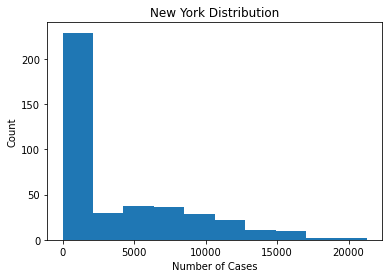

In [59]:
plt.hist(new_NY_df, bins=10)
plt.title("New York Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

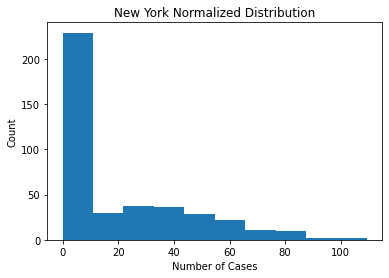

In [60]:
plt.hist(normalized_NY, bins=10)
plt.title("New York Normalized Distribution")
plt.xlabel('Number of Cases')
plt.ylabel('Count')
plt.show()

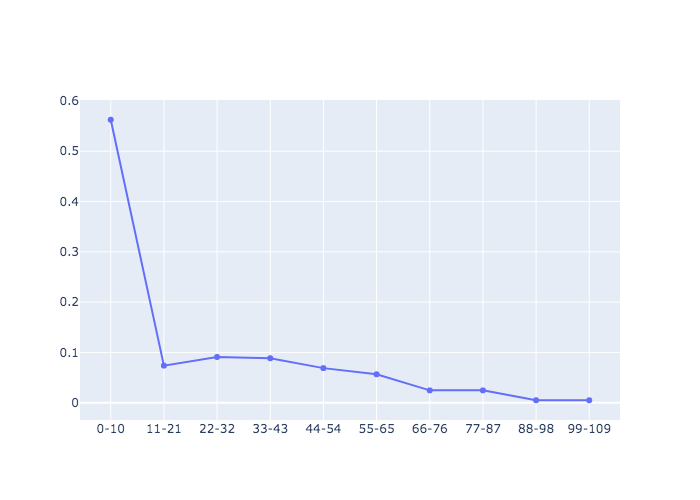

In [61]:
minimum = normalized_NY[0].min()
maximum = normalized_NY[0].max()
bin_min = 0
bin_max = math.ceil(maximum / 10)

bins = []
for i in range(10):
    bins.append(0)
    
for case in normalized_NY[0]:
    if case >= bin_min and case < bin_max:
        bins[0] = bins[0] + 1
    elif case >= bin_max and case < 2 * bin_max:
        bins[1] = bins[1] + 1
    elif case >= 2 * bin_max and case < 3 * bin_max:
        bins[2] = bins[2] + 1
    elif case >= 3 * bin_max and case < 4 * bin_max:
        bins[3] = bins[3] + 1 
    elif case >= 4 * bin_max and case < 5 * bin_max:
        bins[4] = bins[4] + 1
    elif case >= 5 * bin_max and case < 6 * bin_max:
        bins[5] = bins[5] + 1
    elif case >= 6 * bin_max and case < 7 * bin_max:
        bins[6] = bins[6] + 1
    elif case >= 7 * bin_max and case < 8 * bin_max:
        bins[7] = bins[7] + 1
    elif case >= 8 * bin_max and case < 9 * bin_max:
        bins[8] = bins[8] + 1
    elif case >= 9 * bin_max and case < 10 * bin_max:
        bins[9] = bins[9] + 1
        

bin_df = pd.DataFrame(bins, columns = ['Count'])
bin_df['Range'] = ['0-10', '11-21', '22-32', '33-43', '44-54', '55-65', '66-76', '77-87', '88-98', '99-109']
bin_df['Count'] = bin_df['Count'].apply(lambda x: x / bin_df['Count'].sum())
bin_df = bin_df.set_index('Range')


fig = go.Figure()
fig.add_trace(go.Scatter(x=bin_df.index, y=bin_df['Count'],
                    mode='lines+markers',
                    name=''))
fig = fig.to_image(format="png")
Image(fig)

Compared to the Oregon data, the New York data is less skewed to the right and has a much lower kurtosis. It is more likely to have a higher number of new cases per day. This data has a lower peak with a shorter tail. The most likely number of new cases per day per 100000 people still falls in a lower range (0-11). New York seems to have a higher likelihood of having a higher number of new cases than the other states.

In [62]:
print('Skew: ', normalized_NY[0].skew())
print('Kurtosis: ', normalized_NY[0].kurt())
print('Mean: ', normalized_NY[0].mean())
print('Median: ', normalized_NY[0].median())
print('Variance: ', normalized_NY[0].var())
print('Standard Deviation: ', normalized_NY[0].std())

Skew:  1.2164647815264131
Kurtosis:  0.5863385614635033
Mean:  20.841974086421217
Median:  7.7569345787128645
Variance:  576.1994327811576
Standard Deviation:  24.004154490028547


### Poisson (State Cases)  
In general, the poisson distributions have similar shapes. The difference lies in the location of the peak and the probability associated with it. Oregon and Washington seem to have a higher probability of having a smaller number of cases at this peak point. California, North Carolina, Virginia, and New York have a higher probability of having a slightly higher number of cases than WAshington and Oregon.

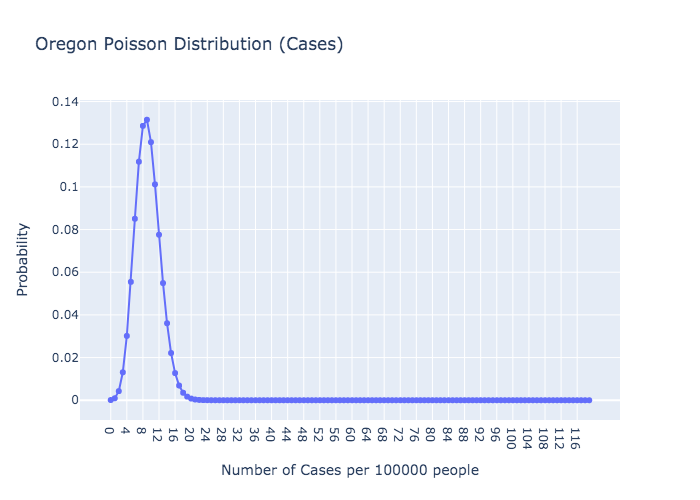

In [63]:
def get_state_case_poisson(normalized_cases, initial, end, step, state):
    pmf_list = []
    range_list = []
    for i in range(initial, end, step):
        value = stats.poisson.pmf(i ,normalized_cases[0].mean())
        pmf_list.append(value)
        range_list.append(str(i))

    pmf_df = pd.DataFrame(pmf_list, columns = ['Probability'])

    pmf_df['New Cases'] = range_list
    pmf_df = pmf_df.set_index('New Cases')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=pmf_df.index, y=pmf_df['Probability'],
                    mode='lines+markers',
                    name=''))
    
    fig.update_layout(
        title=state,
        xaxis_title="Number of Cases per 100000 people",
        yaxis_title="Probability")
        
    fig = fig.to_image(format="png")
    return Image(fig)


get_state_case_poisson(normalized_cases, 0, 120, 1, 'Oregon Poisson Distribution (Cases)')

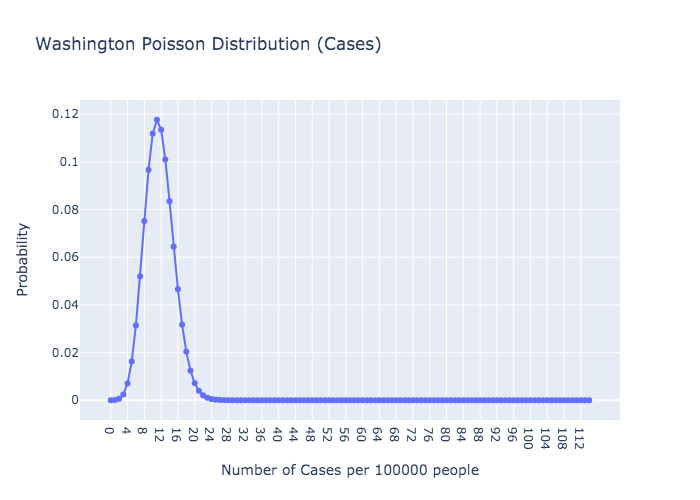

In [64]:
get_state_case_poisson(normalized_WA, 0, 115, 1, 'Washington Poisson Distribution (Cases)')

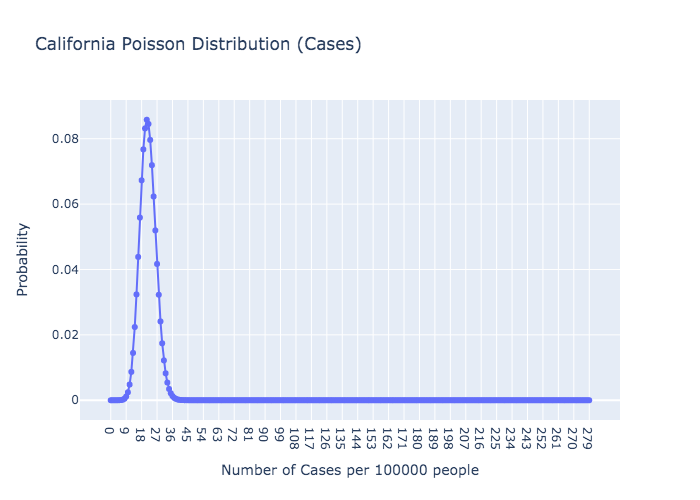

In [65]:
get_state_case_poisson(normalized_CA, 0, 280, 1, 'California Poisson Distribution (Cases)')

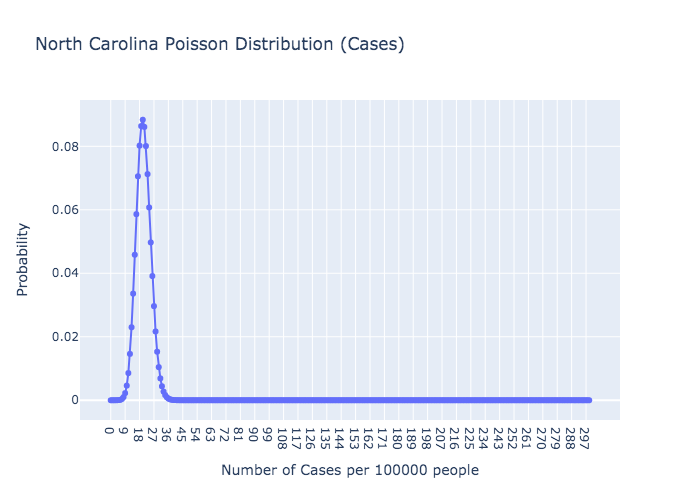

In [66]:
get_state_case_poisson(normalized_NC, 0, 300, 1, 'North Carolina Poisson Distribution (Cases)')

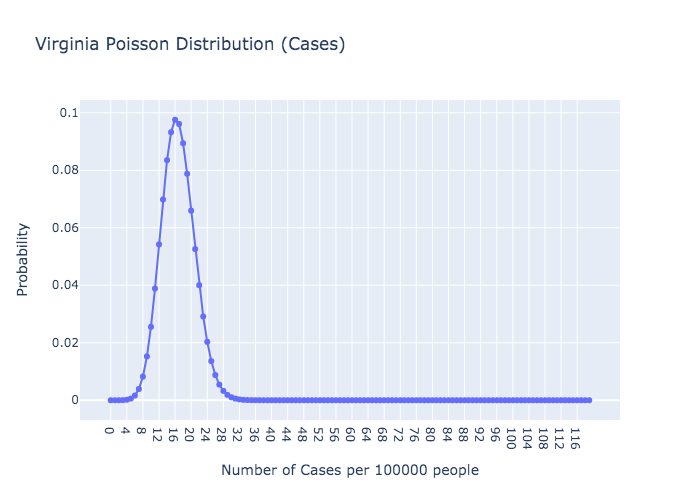

In [67]:
get_state_case_poisson(normalized_VA, 0, 120, 1, 'Virginia Poisson Distribution (Cases)')

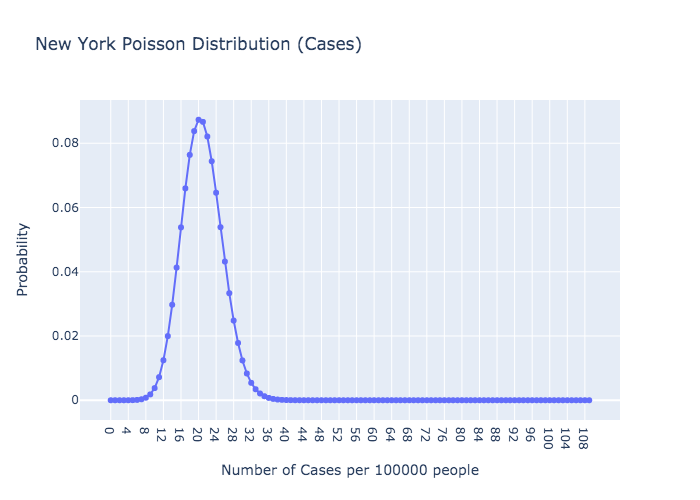

In [68]:
get_state_case_poisson(normalized_NY, 0, 110, 1, 'New York Poisson Distribution (Cases)')

### Poisson (State Deaths)  
For all states, the poisson distrbution for deaths are very similar. All states have a higher likelihood of having a small number of cases per day and the probability decreases rapidly for higher numbers of cases.

In [69]:
def get_normalized_deaths(state_fips):
    dataset = super_dataset[super_dataset['StateFIPS'] == state_fips]
    cases_deaths = dataset[dataset.columns[5:-2]]
    deaths = pd.concat([dataset[dataset.columns[0:5]],cases_deaths[cases_deaths.columns[1::2]]], axis=1)

    new = deaths[deaths.columns[5:]].diff(axis=1)
    new['2020-01-22_deaths'] = deaths['2020-01-22_deaths']
    new_df = new.sum().to_frame()
    new_df = new_df[new_df[0] >= 0]

    normalized = new_df.apply(lambda x: (x / dataset['population'].sum()) * 100000)
    normalized = normalized[normalized[0] >= 0]
    return normalized

In [70]:
OR_death_normalized = get_normalized_deaths(41)
WA_death_normalized = get_normalized_deaths(53)
CA_death_normalized = get_normalized_deaths(6)
NC_death_normalized = get_normalized_deaths(37)
VA_death_normalized = get_normalized_deaths(51)
NY_death_normalized = get_normalized_deaths(36)

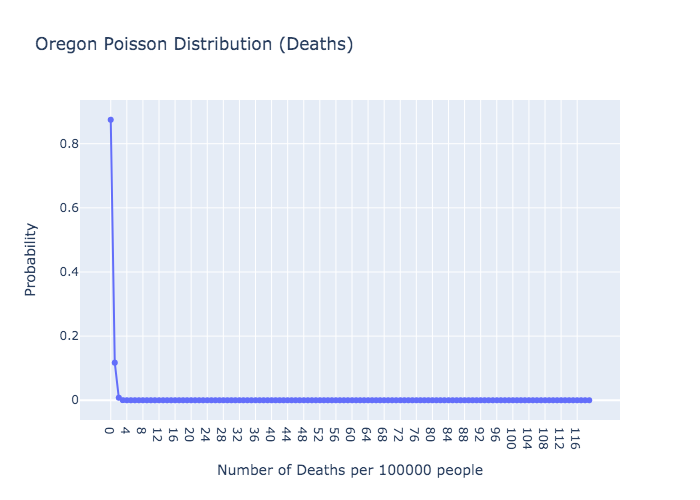

In [71]:
def get_state_death_poisson(normalized_deaths, initial, end, step, state):
    pmf_list = []
    range_list = []
    for i in range(initial, end, step):
        value = stats.poisson.pmf(i ,normalized_deaths[0].mean())
        pmf_list.append(value)
        range_list.append(str(i))

    pmf_df = pd.DataFrame(pmf_list, columns = ['Probability'])

    pmf_df['New Deaths'] = range_list
    pmf_df = pmf_df.set_index('New Deaths')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=pmf_df.index, y=pmf_df['Probability'],
                    mode='lines+markers',
                    name=''))
    
    fig.update_layout(
        title=state,
        xaxis_title="Number of Deaths per 100000 people",
        yaxis_title="Probability")
        
    fig = fig.to_image(format="png")
    return Image(fig)


get_state_death_poisson(OR_death_normalized, 0, 120, 1, 'Oregon Poisson Distribution (Deaths)')

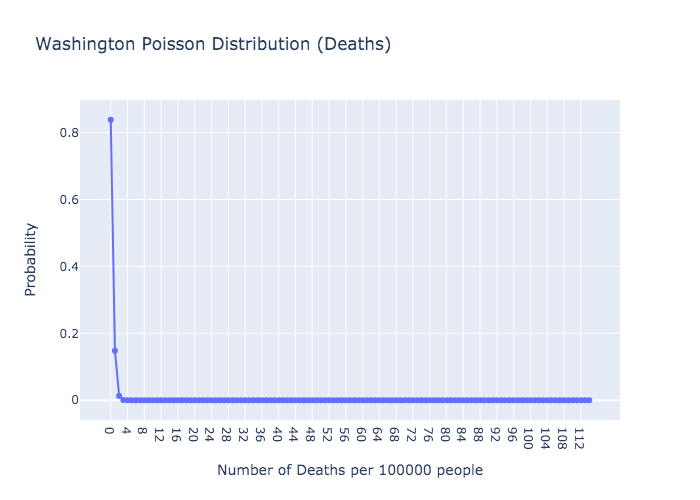

In [72]:
get_state_death_poisson(WA_death_normalized, 0, 115, 1, 'Washington Poisson Distribution (Deaths)')

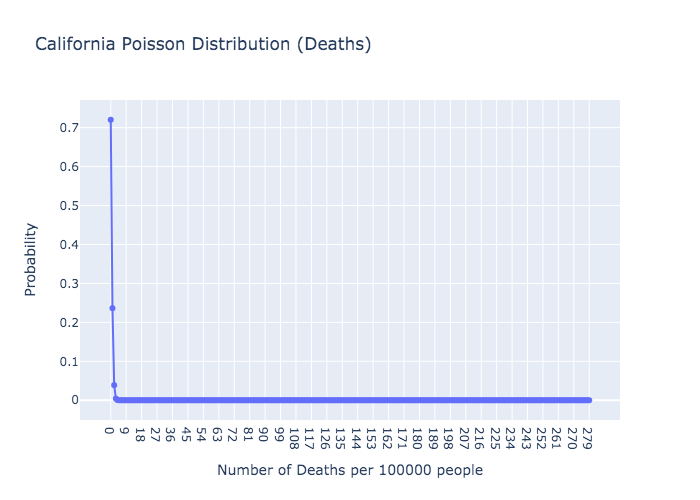

In [73]:
get_state_death_poisson(CA_death_normalized, 0, 280, 1, 'California Poisson Distribution (Deaths)')

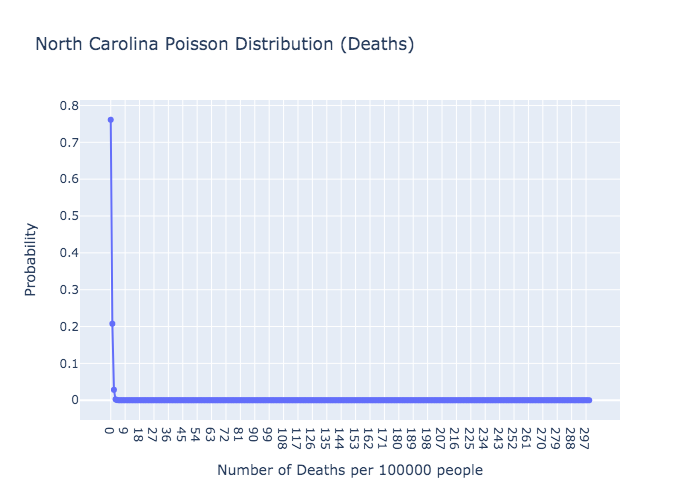

In [74]:
get_state_death_poisson(NC_death_normalized, 0, 300, 1, 'North Carolina Poisson Distribution (Deaths)')

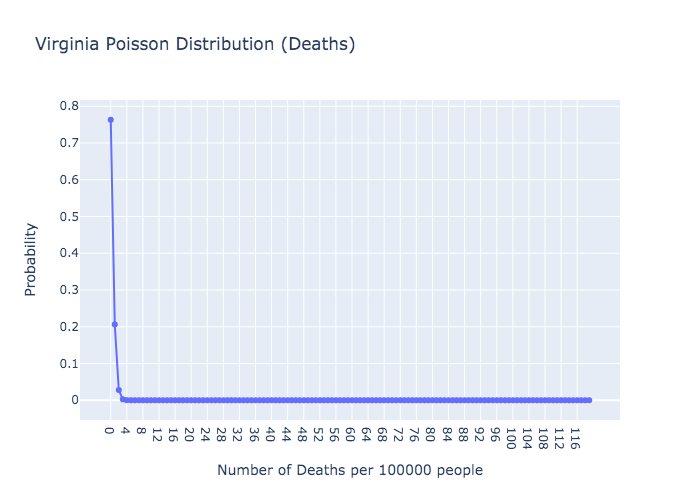

In [75]:
get_state_death_poisson(VA_death_normalized, 0, 120, 1, 'Virginia Poisson Distribution (Deaths)')

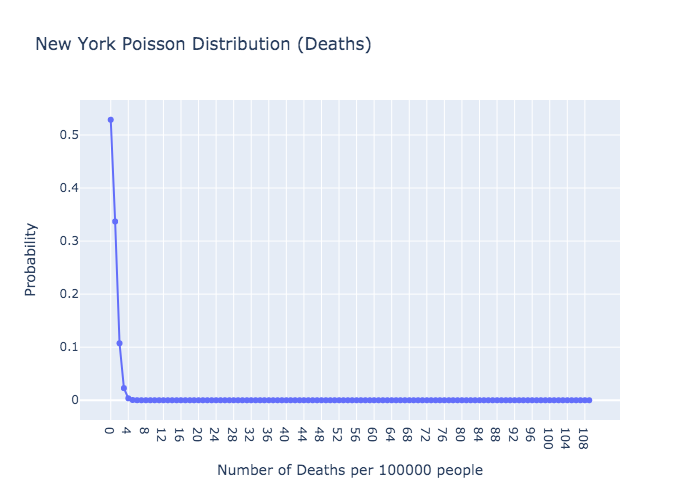

In [76]:
get_state_death_poisson(NY_death_normalized, 0, 110, 1, 'New York Poisson Distribution (Deaths)')

### Poisson (County Cases)  
Repeat this process again for 5 counties in North Carolina. Guilford, Forsyth, Yadkin, and Mecklenburg Counties have similar distributions. Orange County has a higher probability of have a lower number of new cases per day in comparison to the rest of the counties.

In [77]:
NC_dataset = super_dataset[super_dataset['StateFIPS'] == 37]

In [94]:
def get_normalized_county_cases(county_fips):
    dataset = NC_dataset[NC_dataset['countyFIPS'] == county_fips]
    cases_deaths = dataset[dataset.columns[5:-2]]
    cases = pd.concat([dataset[dataset.columns[0:5]],cases_deaths[cases_deaths.columns[0::2]]], axis=1)

    new = cases[cases.columns[5:]].diff(axis=1)
    new['2020-01-22_cases'] = cases['2020-01-22_cases']
    new_df = new.sum().to_frame()
    new_df = new_df[new_df[0] >= 0]

    normalized = new_df.apply(lambda x: (x / dataset['population'].sum()) * 100000)
    normalized = normalized[normalized[0] >= 0]
    return normalized

In [101]:
Guilford_cases = get_normalized_county_cases(37081)
Forsyth_cases = get_normalized_county_cases(37067)
Orange_cases = get_normalized_county_cases(37135)
Yadkin_cases = get_normalized_county_cases(37197)
Mecklenburg_cases = get_normalized_county_cases(37119)

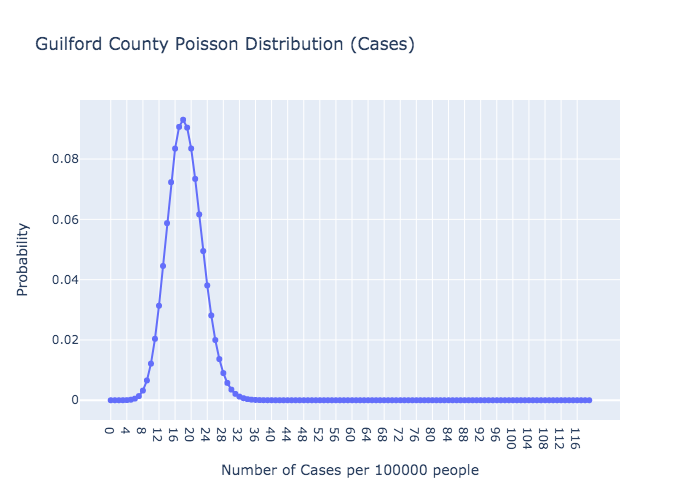

In [105]:
get_state_case_poisson(Guilford_cases, 0, 120, 1, 'Guilford County Poisson Distribution (Cases)')

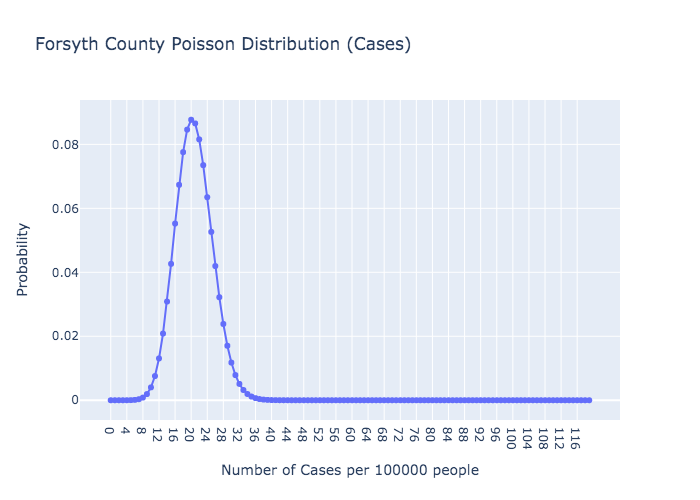

In [106]:
get_state_case_poisson(Forsyth_cases, 0, 120, 1, 'Forsyth County Poisson Distribution (Cases)')

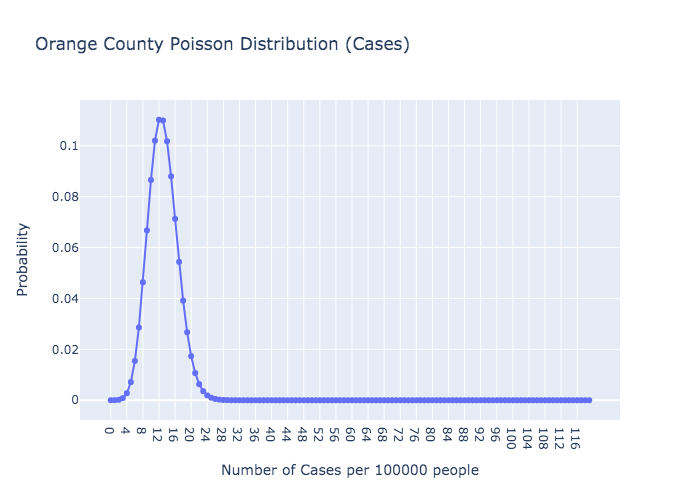

In [107]:
get_state_case_poisson(Orange_cases, 0, 120, 1, 'Orange County Poisson Distribution (Cases)')

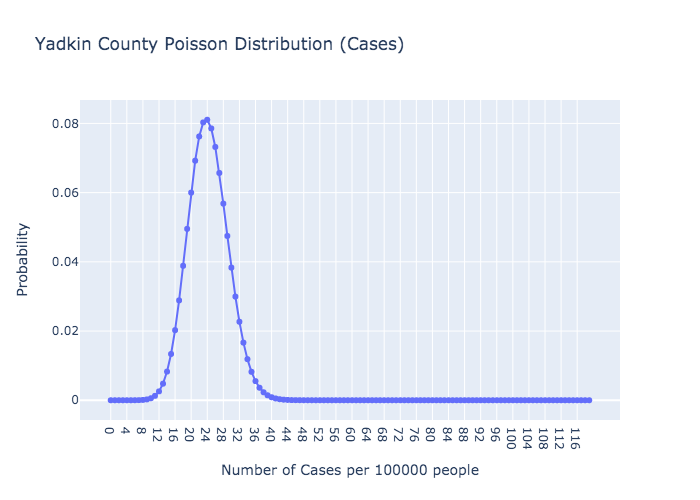

In [108]:
get_state_case_poisson(Yadkin_cases, 0, 120, 1, 'Yadkin County Poisson Distribution (Cases)')

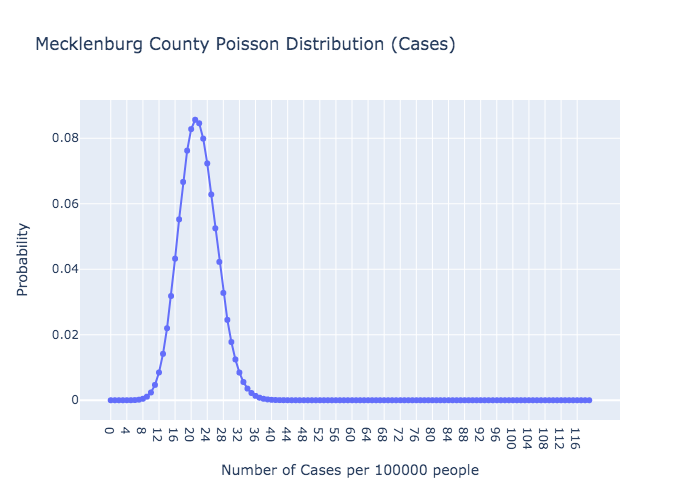

In [109]:
get_state_case_poisson(Mecklenburg_cases, 0, 120, 1, 'Mecklenburg County Poisson Distribution (Cases)')

### Poisson (County Deaths)  
Repeat this process for county deaths. Here, we see that the county death distributions are all very similar to each other. Like in the distributions of the state deaths, there is a much higher liklihood of there being a smaller number of deaths per day for all of these counties. There are small differences in the actual probability values.

In [103]:
def get_normalized_county_deaths(county_fips):
    dataset = NC_dataset[NC_dataset['countyFIPS'] == county_fips]
    cases_deaths = dataset[dataset.columns[5:-2]]
    deaths = pd.concat([dataset[dataset.columns[0:5]],cases_deaths[cases_deaths.columns[1::2]]], axis=1)

    new = deaths[deaths.columns[5:]].diff(axis=1)
    new['2020-01-22_deaths'] = deaths['2020-01-22_deaths']
    new_df = new.sum().to_frame()
    new_df = new_df[new_df[0] >= 0]

    normalized = new_df.apply(lambda x: (x / dataset['population'].sum()) * 100000)
    normalized = normalized[normalized[0] >= 0]
    return normalized

In [104]:
Guilford_deaths = get_normalized_county_deaths(37081)
Forsyth_deaths = get_normalized_county_deaths(37067)
Orange_deaths = get_normalized_county_deaths(37135)
Yadkin_deaths = get_normalized_county_deaths(37197)
Mecklenburg_deaths = get_normalized_county_deaths(37119)

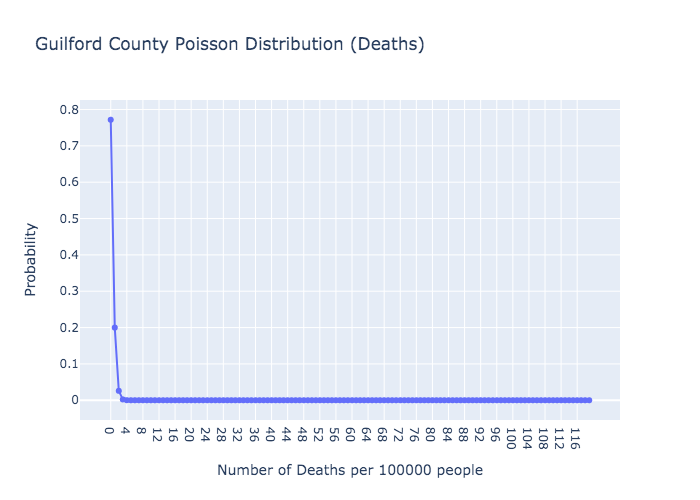

In [110]:
get_state_death_poisson(Guilford_deaths, 0, 120, 1, 'Guilford County Poisson Distribution (Deaths)')

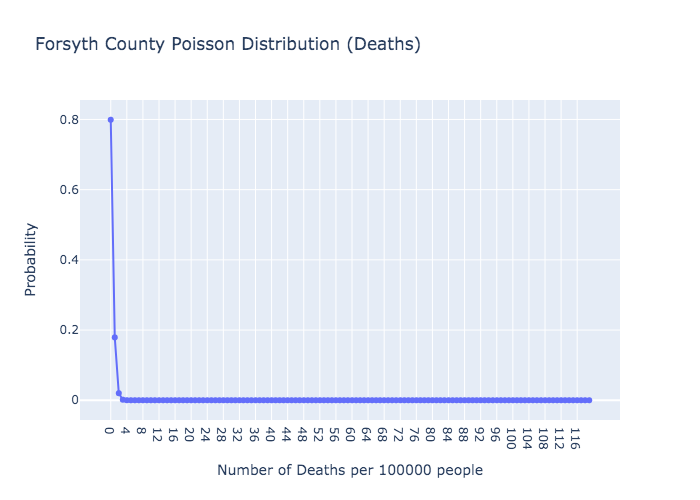

In [111]:
get_state_death_poisson(Forsyth_deaths, 0, 120, 1, 'Forsyth County Poisson Distribution (Deaths)')

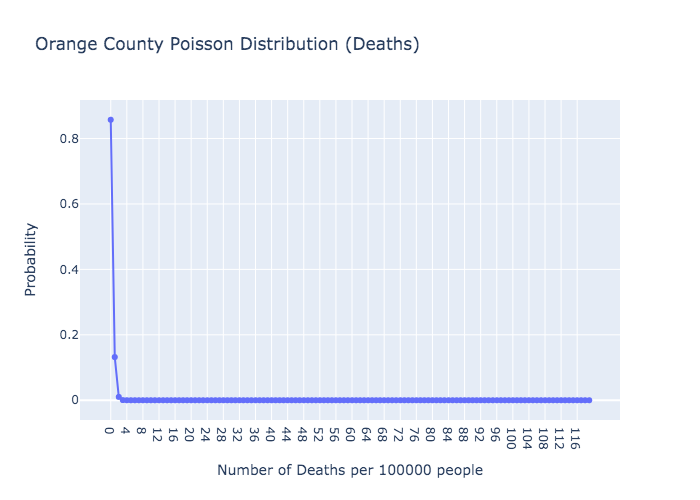

In [112]:
get_state_death_poisson(Orange_deaths, 0, 120, 1, 'Orange County Poisson Distribution (Deaths)')

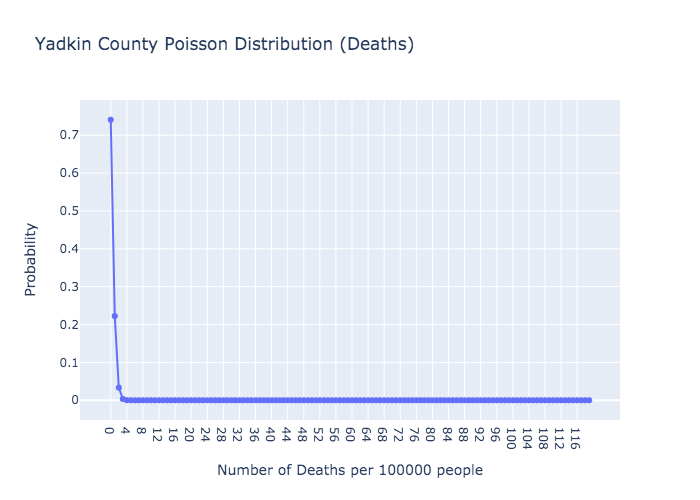

In [113]:
get_state_death_poisson(Yadkin_deaths, 0, 120, 1, 'Yadkin County Poisson Distribution (Deaths)')

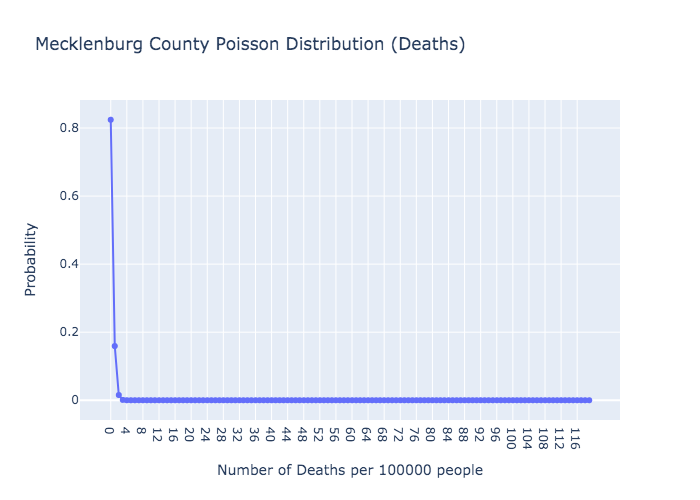

In [114]:
get_state_death_poisson(Mecklenburg_deaths, 0, 120, 1, 'Mecklenburg County Poisson Distribution (Deaths)')

# Enrichment Data  
Import the presidential dataset. Get dataset with only Oregon information.

In [80]:
presidential_dataset = pd.read_csv('../../../../data/stage_I/presidential_super_dataset.csv')
presidential_dataset = presidential_dataset[presidential_dataset['StateFIPS'] == 41]
presidential_dataset.head()

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,...,2021-03-04_cases,2021-03-04_deaths,state,county,candidate,party,total_votes,won,0,1
14693,14693,41001,Baker County,OR,41,16124,0,0,0,0,...,666,9,Oregon,Baker County,Donald Trump,REP,7352,True,Oregon,OR
14694,14694,41001,Baker County,OR,41,16124,0,0,0,0,...,666,9,Oregon,Baker County,Joe Biden,DEM,2346,False,Oregon,OR
14695,14695,41001,Baker County,OR,41,16124,0,0,0,0,...,666,9,Oregon,Baker County,Jo Jorgensen,LIB,144,False,Oregon,OR
14696,14696,41001,Baker County,OR,41,16124,0,0,0,0,...,666,9,Oregon,Baker County,Write-ins,WRI,41,False,Oregon,OR
14697,14697,41001,Baker County,OR,41,16124,0,0,0,0,...,666,9,Oregon,Baker County,Howie Hawkins,GRN,33,False,Oregon,OR


Normalize votes for population and add it as a column in the dataframe.

In [81]:
presidential_dataset['Normalized Votes'] = np.ceil((presidential_dataset['total_votes'] / presidential_dataset['population']) * 100000)
presidential_dataset.head()

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,...,2021-03-04_deaths,state,county,candidate,party,total_votes,won,0,1,Normalized Votes
14693,14693,41001,Baker County,OR,41,16124,0,0,0,0,...,9,Oregon,Baker County,Donald Trump,REP,7352,True,Oregon,OR,45597.0
14694,14694,41001,Baker County,OR,41,16124,0,0,0,0,...,9,Oregon,Baker County,Joe Biden,DEM,2346,False,Oregon,OR,14550.0
14695,14695,41001,Baker County,OR,41,16124,0,0,0,0,...,9,Oregon,Baker County,Jo Jorgensen,LIB,144,False,Oregon,OR,894.0
14696,14696,41001,Baker County,OR,41,16124,0,0,0,0,...,9,Oregon,Baker County,Write-ins,WRI,41,False,Oregon,OR,255.0
14697,14697,41001,Baker County,OR,41,16124,0,0,0,0,...,9,Oregon,Baker County,Howie Hawkins,GRN,33,False,Oregon,OR,205.0


Create function to return the normalized mean value of new cases for each county.

In [82]:
def get_normalized_cases(county_fips):
    county_cases = OR_cases[OR_cases['countyFIPS'] == county_fips]
    new_county_cases = county_cases[county_cases.columns[5:]].diff(axis=1)
    new_county_cases['2020-01-22_cases'] = county_cases['2020-01-22_cases']

    normalized_county_cases = new_county_cases.apply(lambda x: (x / county_cases['population']) * 100000)
    normalized_county_cases = normalized_county_cases.transpose()
    return np.ceil(normalized_county_cases.mean(axis=0)).item()

Add the normalized mean cases as a column in the dataframe.

In [83]:
mean_cases = []
for county in presidential_dataset['countyFIPS']:
    mean_cases.append(get_normalized_cases(county))

presidential_dataset['Mean Cases'] = mean_cases
presidential_dataset

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,...,state,county,candidate,party,total_votes,won,0,1,Normalized Votes,Mean Cases
14693,14693,41001,Baker County,OR,41,16124,0,0,0,0,...,Oregon,Baker County,Donald Trump,REP,7352,True,Oregon,OR,45597.0,11.0
14694,14694,41001,Baker County,OR,41,16124,0,0,0,0,...,Oregon,Baker County,Joe Biden,DEM,2346,False,Oregon,OR,14550.0,11.0
14695,14695,41001,Baker County,OR,41,16124,0,0,0,0,...,Oregon,Baker County,Jo Jorgensen,LIB,144,False,Oregon,OR,894.0,11.0
14696,14696,41001,Baker County,OR,41,16124,0,0,0,0,...,Oregon,Baker County,Write-ins,WRI,41,False,Oregon,OR,255.0,11.0
14697,14697,41001,Baker County,OR,41,16124,0,0,0,0,...,Oregon,Baker County,Howie Hawkins,GRN,33,False,Oregon,OR,205.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,14904,41071,Yamhill County,OR,41,107100,0,0,0,0,...,Oregon,Yamhill County,Joe Biden,DEM,27174,False,Oregon,OR,25373.0,9.0
14905,14905,41071,Yamhill County,OR,41,107100,0,0,0,0,...,Oregon,Yamhill County,Jo Jorgensen,LIB,1448,False,Oregon,OR,1353.0,9.0
14906,14906,41071,Yamhill County,OR,41,107100,0,0,0,0,...,Oregon,Yamhill County,Write-ins,WRI,377,False,Oregon,OR,353.0,9.0
14907,14907,41071,Yamhill County,OR,41,107100,0,0,0,0,...,Oregon,Yamhill County,Howie Hawkins,GRN,254,False,Oregon,OR,238.0,9.0


Create dataframes for the republican, democrat, and other parties.

In [84]:
republican = presidential_dataset[presidential_dataset['party'] == 'REP']
democrat = presidential_dataset[presidential_dataset['party'] == 'DEM']
other = presidential_dataset[presidential_dataset['party'] != 'REP']
other = other[other['party'] != 'DEM']

Create a dataframe with the other parties' mean cases and normalized total votes so correlation can be performed.

In [85]:
other_group = other.groupby(['countyFIPS','Mean Cases'])['Normalized Votes'].sum().to_frame()
other_group.reset_index(inplace=True)
other_group.head()

,countyFIPS,Mean Cases,Normalized Votes
0,41001,11.0,1454.0
1,41003,7.0,2253.0
2,41005,8.0,1945.0
3,41007,5.0,1931.0
4,41009,6.0,2363.0


### Correlation Results
Here the strongest correlation can be seen with the 'Others' group of presidential votes (containing all other parties' votes excluding republican and democratic votes) and the mean values of new cases over all covid data. The next strongest is the democratic relationship and then the republican. All correlation values are negative meaning that the higher number of new cases in the county per day, the less votes a party had or the higher the number of votes a county had for a party, the lower the number of new cases in the county per day.

Republican correlation:

In [86]:
republican['Mean Cases'].corr(republican['Normalized Votes'])

-0.20555800578072958

Democratic correlation:

In [87]:
democrat['Mean Cases'].corr(democrat['Normalized Votes'])

-0.4053963970914797

All other parties correlation:

In [88]:
other_group['Mean Cases'].corr(other_group['Normalized Votes'])

-0.5243997659906083

### Hypothesis

1.) Does a higher number of voters (normalized) for a certain party lead to a higher initial increase in COVID-19 cases?  
2.) Does a higher number of voters (normalized) for a certain party lead to a higher number of COVID-19 cases overall?  
3.) Do counties with a certain party winner have a higher number of COVID-19 cases overall (normalized)?